# **What is Sentiment Analysis?**
Sentiment analysis is a natural language processing (NLP) technique used to determine the emotional tone behind a body of text. It is commonly applied to analyze reviews, social media posts, or any text data to classify sentiments as positive, negative, or neutral.

# **Why Perform Sentiment Analysis?**
Sentiment analysis helps organizations and individuals:

* **nderstand Customer Feedback:** Analyze product or service reviews to gauge customer satisfaction.
* **Monitor Public Opinion:** Assess opinions on social media about brands, events, or topics.
* **Enhance Decision-Making:** Provide actionable insights to improve products, services, or communication strategies.


# **IMDB Dataset**
For this task, we are using the IMDB Reviews Dataset, which contains following key features:

* **Reviews:** Movie reviews written by users.
* **Sentiment Labels:** The sentiment associated with each review, either positive or negative.


### **Step 1: Text Preprocessing**

**1. Load the Dataset**



In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset with error handling
df = pd.read_csv('imdb reviews.csv')

# Display the first few rows
print(df.head())


                                              review sentiment
0  Loved every bit of it! A masterpiece of modern...  positive
1  Loved every bit of it! A masterpiece of modern...  positive
2  A total waste of time. Couldn't wait for it to...  negative
3  Loved every bit of it! A masterpiece of modern...  positive
4  Loved every bit of it! A masterpiece of modern...  positive


In [5]:
# Check the dataset structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None


**2. Tokenization**

In [7]:
import nltk
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')

# Example: Tokenize the first review
df['tokens'] = df['review'].apply(word_tokenize)
print(df[['review', 'tokens']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                              review  \
0  Loved every bit of it! A masterpiece of modern...   
1  Loved every bit of it! A masterpiece of modern...   
2  A total waste of time. Couldn't wait for it to...   
3  Loved every bit of it! A masterpiece of modern...   
4  Loved every bit of it! A masterpiece of modern...   

                                              tokens  
0  [Loved, every, bit, of, it, !, A, masterpiece,...  
1  [Loved, every, bit, of, it, !, A, masterpiece,...  
2  [A, total, waste, of, time, ., Could, n't, wai...  
3  [Loved, every, bit, of, it, !, A, masterpiece,...  
4  [Loved, every, bit, of, it, !, A, masterpiece,...  


**3. Remove Stopwords**

In [8]:
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stopwords from tokens
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
print(df[['review', 'tokens']].head())


                                              review  \
0  Loved every bit of it! A masterpiece of modern...   
1  Loved every bit of it! A masterpiece of modern...   
2  A total waste of time. Couldn't wait for it to...   
3  Loved every bit of it! A masterpiece of modern...   
4  Loved every bit of it! A masterpiece of modern...   

                                              tokens  
0  [Loved, every, bit, !, masterpiece, modern, ci...  
1  [Loved, every, bit, !, masterpiece, modern, ci...  
2  [total, waste, time, ., Could, n't, wait, end, .]  
3  [Loved, every, bit, !, masterpiece, modern, ci...  
4  [Loved, every, bit, !, masterpiece, modern, ci...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**4. Perform Lemmatization**

In [9]:
from nltk.stem import WordNetLemmatizer

# Download WordNet data
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Lemmatize tokens
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print(df[['review', 'tokens']].head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


                                              review  \
0  Loved every bit of it! A masterpiece of modern...   
1  Loved every bit of it! A masterpiece of modern...   
2  A total waste of time. Couldn't wait for it to...   
3  Loved every bit of it! A masterpiece of modern...   
4  Loved every bit of it! A masterpiece of modern...   

                                              tokens  
0  [Loved, every, bit, !, masterpiece, modern, ci...  
1  [Loved, every, bit, !, masterpiece, modern, ci...  
2  [total, waste, time, ., Could, n't, wait, end, .]  
3  [Loved, every, bit, !, masterpiece, modern, ci...  
4  [Loved, every, bit, !, masterpiece, modern, ci...  


### **Step 2: Feature Engineering**

**TF-IDF Transformation**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency

# Transform the reviews into TF-IDF vectors
X = tfidf.fit_transform(df['review'])

# Check the shape of the resulting matrix
print("Shape of TF-IDF matrix:", X.shape)

# Labels
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # Encode sentiment as binary
print("Label distribution:\n", y.value_counts())


Shape of TF-IDF matrix: (1000, 70)
Label distribution:
 sentiment
0    525
1    475
Name: count, dtype: int64


### **Step 3: Model Training and Evaluation**



**1: Logistic Regression**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Print model training success
print("Model training completed.")


Model training completed.


**Logistic Regression Model Evaluation**

Model Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


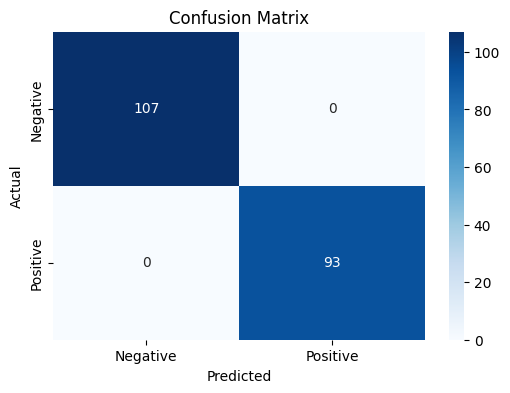


Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       107
    Positive       1.00      1.00      1.00        93

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


**2: Naive Bayes**

In [15]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Print a message to indicate training is complete
print("Naive Bayes model training completed.")


Naive Bayes model training completed.


**Naive Bayes Model Evaluation**

Naive Bayes Model Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


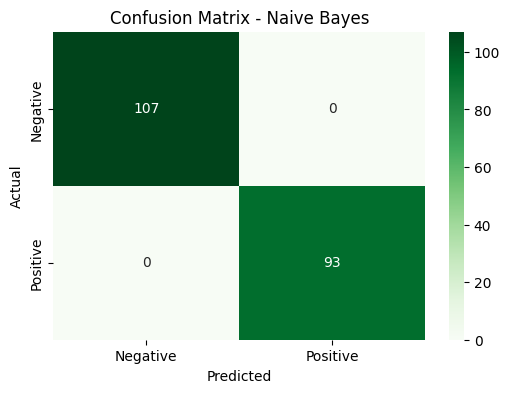


Classification Report - Naive Bayes:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       107
    Positive       1.00      1.00      1.00        93

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Print evaluation metrics
print("Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1-Score: {f1_nb:.2f}")

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Detailed classification report
print("\nClassification Report - Naive Bayes:")
print(classification_report(y_test, y_pred_nb, target_names=['Negative', 'Positive']))
